In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

from scipy.integrate import quad, dblquad, tplquad

from ipykernel.pylab.backend_inline import flush_figures

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
# #     "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

### Example 1

Let $\mathcal R = [1,5]\times[2,3]$. 

  a. Estimate $$\iint_\mathcal R (xy - y^2/6)dA$$ as a Riemann sum using 16 squares.

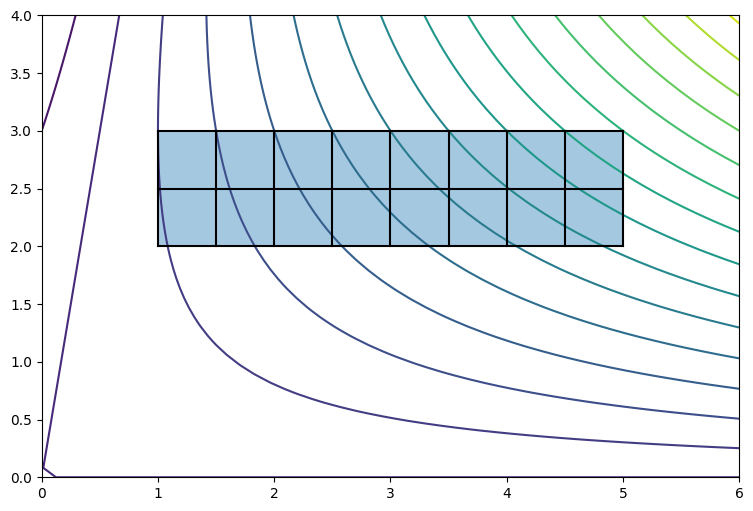

In [2]:
x = linspace(0,6)
y = linspace(0,4)
plt.figure(figsize=(9,6))
x,y = meshgrid(x,y)
plt.contour(x,y,x*y - y**2/6,levels=20);
plt.fill([1,5,5,1],[2,2,3,3],alpha = .4);

# Draw grid
M,N = (8,2)
dx = (5-1)/M
dy = (3-2)/N

[plt.plot([1 + i*dx,1 + i*dx],[2,3],'k') for i in range(M+1)];
[plt.plot([1,5],[2 + j*dy,2 + j*dy],'k') for j in range(N+1)];


#### Solution

For $\Delta x = (5 - 1)/M$ and  $\Delta y = (3-2)/N$, the Riemann sum is 

$$\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} \left( (1+i\Delta x)(2+j\Delta y) - (j+\Delta y)^2/6\right)\Delta x\,\Delta y$$

In [3]:
M,N = (800,200)

dx = (5-1)/M
dy = (3-2)/N

def f(x,y):
    return x*y - y**2/6 

sum([f(1 + (i)*dx,2+(j)*dy) for i in range(M) for j in range(N)])*dx*dy

25.731133333333627

####
b. Evaluate the definite integral in part a. 

#### Solution

In [4]:
dblquad(lambda y,x: x*y - y**2/6,1,5,2,3)[0]

25.77777777777778

####
<p style="padding-bottom:40%;"> </p>

### Example 2 

Switch the order of integration of the following iterated integrals.

a. 
$$\int_0^1 \int_0^x f(x,y)\,dy\,dx $$

#### Solution

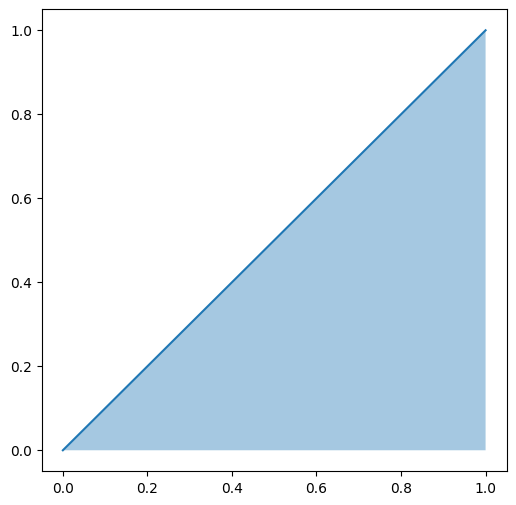

In [5]:
x = linspace(0,1,10) # this divides the interval from 0 to 1 into 10 pieces
plt.figure(figsize=(6,6))
plt.plot(x,x);
plt.fill_between(x,x,alpha=.4);

Pick an arbitrary integrand, here $x \cos(y)$, to test the 2 orders for integration. (Do mind the peculiarities of `dblquad` when dealing with orders of integration.)

$y$ on the inside: 

$$\int_0^1 \int_{0}^x x\cos(y)\, dy\,dx $$

In [6]:
dblquad(lambda y,x: x*cos(y),0,1,0,lambda x:x)

(0.3011686789397568, 9.308899714759727e-15)

$x$ on the inside: 

$$\int_0^1 \int_{y}^1 x\cos(y)\, dx\,dy $$

In [7]:
dblquad(lambda x,y: x*cos(y),0,1,lambda y:y,1)

(0.30116867893975674, 5.551075862445926e-15)

####
b.
$$\int_0^1 \int_0^{e^y} g(x,y)\,dx\,dy $$

#### Solution

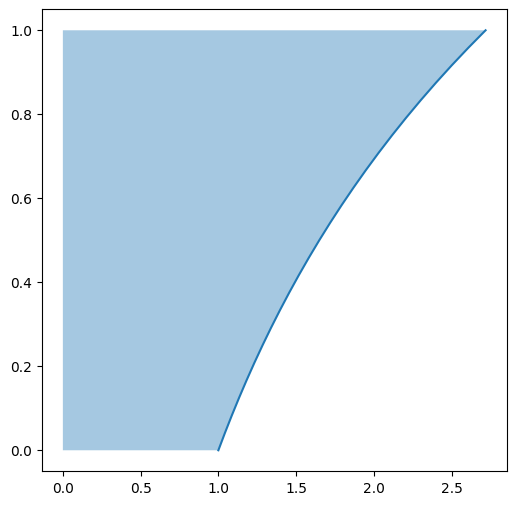

In [8]:
y = linspace(0,1,25)
plt.figure(figsize=(6,6))
plt.plot(exp(y),y)
plt.fill_betweenx(y,exp(y),alpha=.4);

$y$ on the inside (split region in 2): 

$$\int_0^1 \int_{0}^1 x\cos(y)\, dy\,dx  + \int_1^e \int_{\ln x}^1 x\cos(y)\, dy\,dx  $$

In [9]:
dblquad(lambda y,x: x*cos(y),0,1,0,1)[0] + dblquad(lambda y,x: x*cos(y),1,exp(1),log,1)[0]

1.2202324409250511

$x$ on the inside: 

$$\int_0^1 \int_{y}^1 x\cos(y)\, dx\,dy $$

In [10]:
dblquad(lambda x,y: x*cos(y),0,1,0,exp)

(1.220232440925051, 2.214038351994108e-14)

####
<p style="padding-bottom:40%;"> </p>

### Exercise

Let $\mathcal D$ be the region in the plane bounded by the curves $y=x+|x|$ and $y=x+1$. Compute $$ \iint_\mathcal D y\,dA$$ as an iterated integral. 

#### Solution

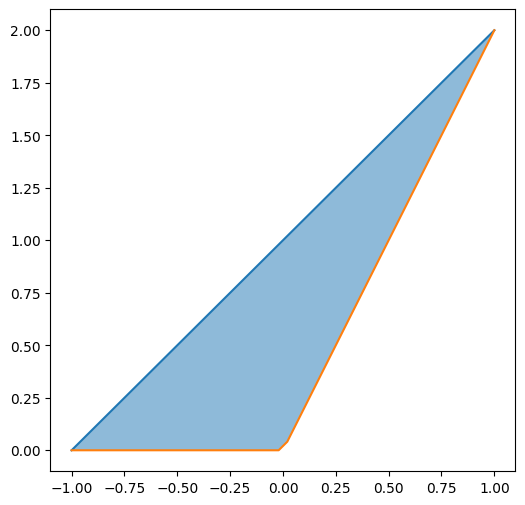

In [11]:
x = linspace(-1,1,50)
plt.figure(figsize=(6,6))
plt.plot(x,x+1,x,abs(x)+x);
plt.fill_between(x,x+1,abs(x)+x,alpha=.5);

$$\int_{-1}^0\int_{0}^{x+1} y \,dy\,dx +  \int_{0}^1\int_{2x}^{x+1} y \,dy\,dx $$

In [12]:
dblquad(lambda y,x: y, -1,1, lambda x:x + abs(x),lambda x:x+1)

(0.6666666666666667, 7.401486830834377e-15)

or $$\int_0^2\int_{y-1}^{y/2} y \,dx\,dy $$

In [13]:
dblquad(lambda x,y: y, 0,2, lambda y:y-1,lambda y:y/2)

(0.6666666666666667, 7.401486830834377e-15)

####
<p style="padding-bottom:40%;"> </p>

### Example

Set up an iterated integral to find the mass of the region between the surface $z=x^2 + y ^2$ and $z = 2x + 1$ if the density is given by $\rho(x,y,z) = 2z$. 

#### Solution

In [14]:
@interact(angle=(-90,90,6),vangle=(0,90,6))
def _(angle=24,vangle=30):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    r = np.linspace(0,1,50)
    th = np.linspace(0,2*pi,80)
    r,th = np.meshgrid(r,th)
    X = sqrt(2)*r*cos(th)+1
    Y = sqrt(2)*r*sin(th)
    Z = X**2 + Y**2
    ax.plot_wireframe(X,Y,Z,rcount=20,ccount=20)
    ax.plot_wireframe(X,Y,2*X + 1,rcount=20,ccount=20)
    ax.plot_surface(X,Y,0*r,rcount=20,ccount=20,color='gray',alpha=.4)
    ax.view_init(vangle,angle)
# axes
    ax.plot([-.5,2.5],[0,0],[0,0],'k')
    ax.plot([0,0],[-1.5,1.5],[0,0],'k')
    ax.plot([0,0],[0,0],[0,5],'k')
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    flush_figures();

interactive(children=(IntSlider(value=24, description='angle', max=90, min=-90, step=6), IntSlider(value=30, d…

Find the boundary of the region (i.e., where the surfaces intersect).

$$z = x^2 + y^2 = 2x+1$$

$$ (x-1)^2 + y^2 = 2$$

$$ y = \pm \sqrt{2-(x-1)^2}$$

$$ \int_{1-\sqrt{2}}^{1+\sqrt{2}}\int_{-\sqrt{2-(x-1)^2}}^{\sqrt{2-(x-1)^2}}\int_{x^2 + y^2}^{2x+1} 2z \,dzdydx$$

In [15]:
from scipy.integrate import tplquad
# help(tplquad)

$$ \int_{1-\sqrt{2}}^{1+\sqrt{2}}\int_{-\sqrt{2-(x-1)^2}}^{\sqrt{2-(x-1)^2}}\int_{x^2 + y^2}^{2x+1} 2z \,dzdydx$$

In [16]:
tplquad(lambda z,y,x: 2*z,1-sqrt(2),1+sqrt(2),
        lambda x: -sqrt(2 - (x-1)**2),lambda x: sqrt(2 - (x-1)**2),
        lambda x,y: x**2 + y**2,lambda x,y: 2*x + 1)

(29.321531433029758, 2.6828850252513803e-09)

####
<p style="padding-bottom:40%;"> </p>